<img src="../fasp/runner/credits/images/FASPNotebook2.jpg" style="float: right;">

### BioDataCatalyst and CRDC Search-Locate-Compute
This script runs the same work as FASPScript2 and uses FASPRunner twice

In [1]:
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.loc import DRSMetaResolver
from fasp.workflow import GCPLSsamtools
from fasp.search import BigQuerySearchClient

faspRunner = FASPRunner(program='GTEX_TCGA_viaFASPRunner.ipynb')
runNote = 'CRDC and BioDataCatalyst via FASPRunner'

### Step 1 - Discovery
Query for relevant DRS objects

In [2]:
searchClient = BigQuerySearchClient()

# TCGA Query - CRDC
crdcquery = """
    SELECT 'case_'||associated_entities__case_gdc_id , 'crdc:'||file_id
    FROM `isb-cgc.GDC_metadata.rel24_fileData_active` 
    where data_format = 'BAM' 
    and project_disease_type = 'Breast Invasive Carcinoma'
    limit 3"""

#COPD query - Topmed	
bdcquery = """
    SELECT SUBJECT_ID, 'bdc:'||read_drs_id
    FROM `isbcgc-216220.COPDGene.phenotype_drs`
    where Weight_KG between 92.5 and 93.0
    LIMIT 3"""

searchClient = BigQuerySearchClient()
drsClient = DRSMetaResolver()

# Step 3 - set up a class that runs samtools for us
# providing the location for the resultssettings = faspRunner.settings
settings = faspRunner.settings
gcplocation = 'projects/{}/locations/{}'.format(settings['GCPProject'], settings['GCPPipelineRegion'])
wesClient = GCPLSsamtools(gcplocation, settings['GCPOutputBucket'])

faspRunner.configure(searchClient, drsClient, wesClient)
runList = faspRunner.runQuery(crdcquery, runNote)

Running query

    SELECT 'case_'||associated_entities__case_gdc_id , 'crdc:'||file_id
    FROM `isb-cgc.GDC_metadata.rel24_fileData_active` 
    where data_format = 'BAM' 
    and project_disease_type = 'Breast Invasive Carcinoma'
    limit 3
subject=case_1b703058-e596-45bc-80fe-8b98d545c2e2, drsID=crdc:030e5e74-6461-4f05-a399-de8e470bc056
sending id 030e5e74-6461-4f05-a399-de8e470bc056 to: crdcDRSClient
workflow submitted, run:5069613306116859965
____________________________________________________________
subject=case_a6edb6ca-ae9f-4da7-8ebe-92d83d2987fb, drsID=crdc:0329fa7e-d768-4bbe-940e-36f0b9829d7c
sending id 0329fa7e-d768-4bbe-940e-36f0b9829d7c to: crdcDRSClient
workflow submitted, run:13615341895894773455
____________________________________________________________
subject=case_a947a945-4721-45cc-bc45-13b8ea41c10e, drsID=crdc:04c68898-ddac-4e15-9f9a-5bf278d55e4a
sending id 04c68898-ddac-4e15-9f9a-5bf278d55e4a to: crdcDRSClient
workflow submitted, run:8358923869779077221
______

### Step 2 - DRS - set up DRS Clients	

In [3]:
runList = faspRunner.runQuery(bdcquery, runNote)

Running query

    SELECT SUBJECT_ID, 'bdc:'||read_drs_id
    FROM `isbcgc-216220.COPDGene.phenotype_drs`
    where Weight_KG between 92.5 and 93.0
    LIMIT 3
subject=COPDGene_Z31408, drsID=bdc:dg.4503/beada767-e232-4bce-a2d5-dff57012e0be
sending id dg.4503/beada767-e232-4bce-a2d5-dff57012e0be to: bdcDRSClient
workflow submitted, run:16906289823574202088
____________________________________________________________
subject=COPDGene_N95128, drsID=bdc:dg.4503/8739f25c-b1aa-440b-865c-fe727ea34e04
sending id dg.4503/8739f25c-b1aa-440b-865c-fe727ea34e04 to: bdcDRSClient
workflow submitted, run:814008927351374639
____________________________________________________________
subject=COPDGene_W85634, drsID=bdc:dg.4503/915c197c-2a63-44c5-9007-9b0c8a797b9a
sending id dg.4503/915c197c-2a63-44c5-9007-9b0c8a797b9a to: bdcDRSClient
workflow submitted, run:18069423379110996385
____________________________________________________________


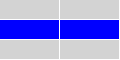

In [4]:
faspRunner.getFASPicon()